<a href="https://colab.research.google.com/github/Warpedro1/intro_machine-learning_classification/blob/main/classificacao__2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
df = pd.read_csv(uri)

df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


#Preparando Dados

In [103]:
mapa = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}

df.rename(columns = mapa, inplace = True)
df.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [104]:
troca = {
    0 : 1,
    1 : 0
}

#tanto para o replace quanto para o rename os dicionários podem ser usados como parâmetros de entrada
df['nao_finalizado'].replace(troca, inplace = True)
df.rename(columns = {'nao_finalizado' : 'finalizado'}, inplace = True)

df.head()

,finalizado,horas_esperadas,preco
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170


#Análise de dados

<Axes: xlabel='horas_esperadas', ylabel='preco'>

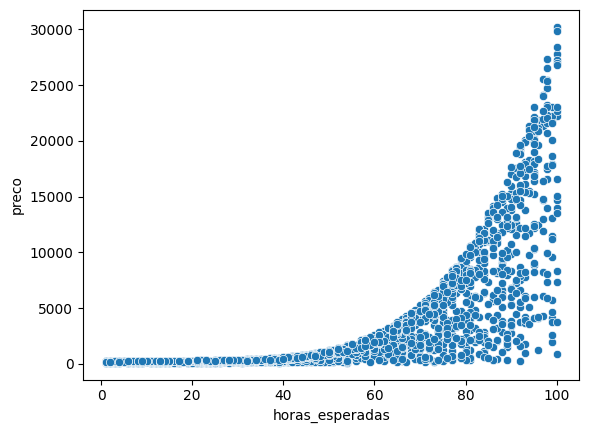

In [105]:
import seaborn as sns

sns.scatterplot(x = "horas_esperadas", y = "preco", data=df)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

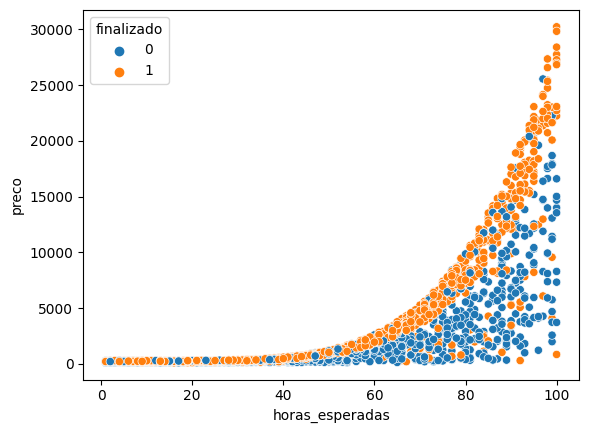

In [106]:
#hue se refere ao tom de cor que sera dados a imagem
#se coloca um dos dados que sera o guia para essa coloração, nessse caso, vem a terceira variável 'finalizados'
sns.scatterplot(x = "horas_esperadas", y = "preco", hue = "finalizado", data=df)

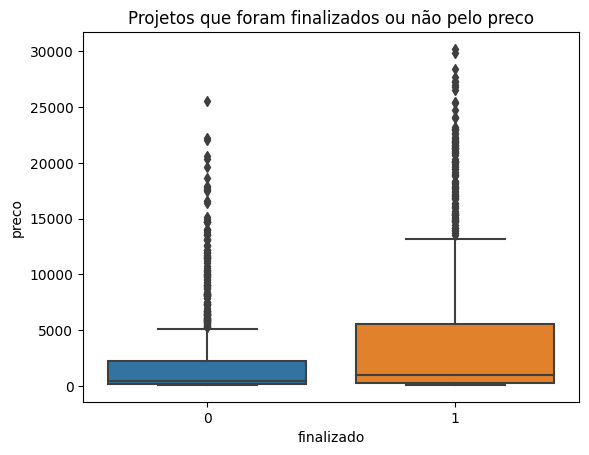

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample dataset

# Create a boxplot
sns.boxplot(x = "finalizado", y = "preco", data=df)

# Add labels and title
plt.xlabel("finalizado")
plt.ylabel("preco")
plt.title("Projetos que foram finalizados ou não pelo preco")

# Show the plot
plt.show()

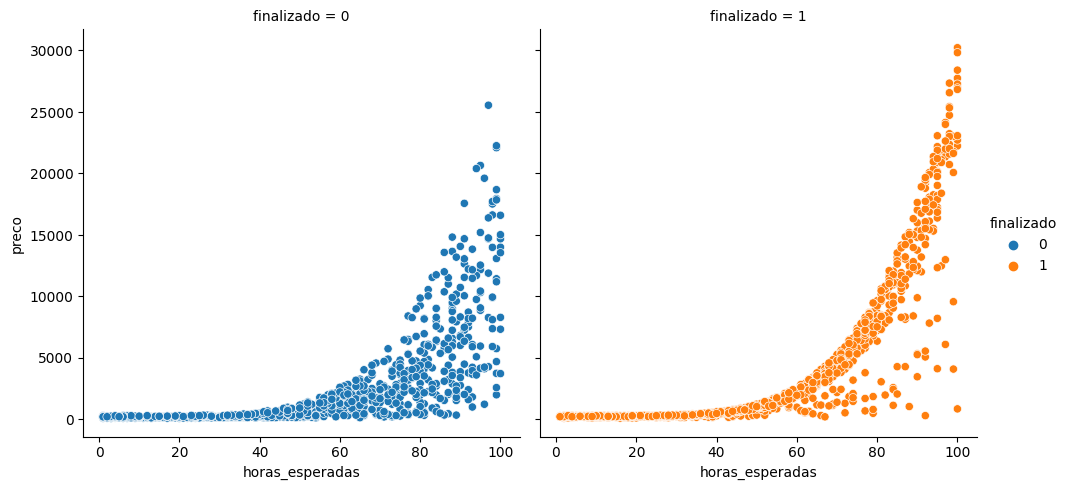

In [108]:
#diferente do scatterplot, o relplot faz dois gráficos diferentes em vez de juntas os dois e colocar cores
sns.relplot(x = "horas_esperadas", y = "preco", col = "finalizado", hue = "finalizado", data=df)

#Separação da base de dados

In [109]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df.drop(columns=['finalizado']), df['finalizado'], test_size = 0.20, random_state= 42 )

#Treinando o modelo

In [110]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(train_x, train_y)

print("Taxa de acurácia: ", accuracy_score(test_y, model.predict(test_x))*100)

Taxa de acurácia:  46.52777777777778


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*para ter um compartivo com o resultado da acurácia , pode se fazer uma linha de base. Uma linha de base, nada mais é do que um chute feito de forma arbitrária pelo pelo progamador, que é posto como as supostas previsões da máquina*

In [111]:
import numpy as np
base_predicted = np.ones(432)
print("Taxa de acurácia do baline: ", accuracy_score(test_y, base_predicted)*100)

Taxa de acurácia do baline:  53.47222222222222


*deu pra ver que o modelo criado não vez muita diferença quantoum chute aleatório, logo ele não foi um modelo eficaz*

#Analisando o resultado do modelo

<Axes: xlabel='horas_esperadas', ylabel='preco'>

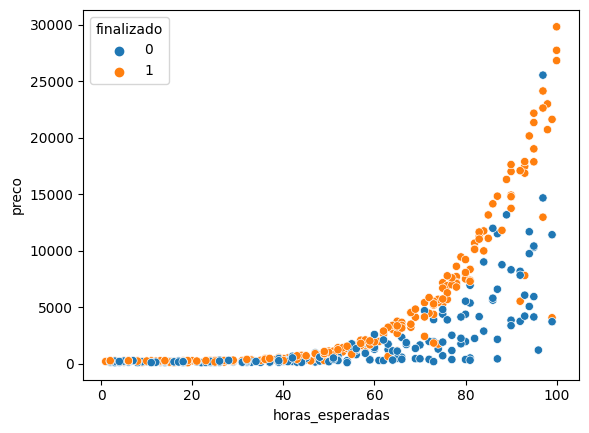

In [94]:
#o parâmtro hue suporta como entra um conjunto de dados para cada cor
#isso porque o data não possui uma coluna 'Finalizado'
sns.scatterplot(x = "horas_esperadas", y = "preco", hue = test_y, data=test_x)



#Melhorando o modelo

In [113]:
x_min = test_x.horas_esperadas.min()
x_max  = test_x.horas_esperadas.max()

y_min  = test_x.preco.min()
y_max  = test_x.preco.max()

print(x_min,x_max,y_min,y_max)

1 100 102 29820


In [114]:
pixels = 100
#np.arange esta fazendo uma lista a partir de x_min até ax_max passando (x_max-x_min)/pixels de cada vez
eixo_x = np.arange(x_min , x_max, (x_max-x_min)/pixels)

pixels = 100
eixo_y =np.arange(y_min , y_max, (y_max-y_min)/pixels)

In [115]:
# np.meshgrid mescla os pontos criando o plano cartsiano dos dois
#np.c_ esta concatenando os valores dos dois array de forma ordenada
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [117]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


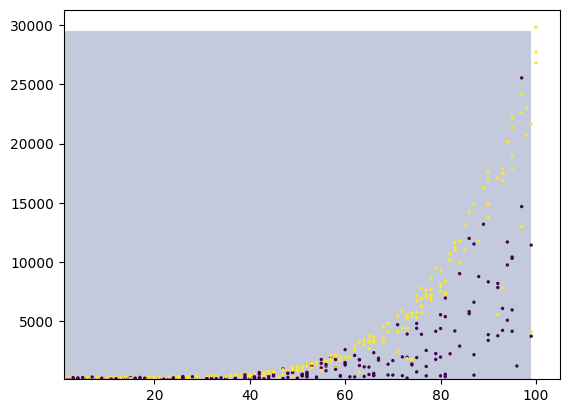

In [118]:
import matplotlib.pyplot as plt
#ira fazer o contorno no gráfico dos dados passados como parâmetro
plt.contourf(xx,yy,Z, alpha = 0.3)
plt.scatter(test_x.horas_esperadas, test_x.preco, c= test_y, s =2)

Da pra ver que a linha de base do nosso modelo, por ser linear, não segue bem a tendencia do dados e por isso mante uma baixa acurácia